(sup_reg_ex: develop)=
## Data product Model Development

Supervised algorithms use inputs (independent variables) and labeled outputs (dependent variable -the "answers") to create a model that can measure its performance and learn over time. Splitting the data into independent and dependent variables, we have the following (again, this will be very similar to the [previous example](sup_class_ex:develop)):

In [1]:
#Note: we only repeat this step from before, because this is a new .ipyb page.
#   it only needs to be executed once per file.

#We'll import libraries as needed, but when submitting, having them all at the top is best practice
import pandas as pd

# Reloading the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url) #read CSV into Python as a dataframe

column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a dataframe

#Choosing the variables. 
X = df.drop(columns=['sepal-length']) #indpendent variables
y = df[['sepal-length']].copy() #dependent variables

(sup_reg_ex: develop: train)=
### Train Model

Recall, splitting the data into training and testing sets is not required, but it is good practice. Furthermore, it provides content for part D. 

As with the previous example [previous example](sup_class_ex:develop)), we'll use [scikit-learn aka sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) built-ins for this.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

#split the variable sets into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)

In [3]:
#Nice displays are nice but not required. 
from IPython.display import display_html 
X_train_styler = X_train.head(5).style.set_table_attributes("style='display:inline'").set_caption('Independents variables')
y_train_styler = y_train.head(5).style.set_table_attributes("style='display:inline'").set_caption('Dependents variables')
space = "\xa0" * 10 #space between columns
display_html(X_train_styler._repr_html_()+ space  + y_train_styler._repr_html_(), raw=True)

Independents variables 
 
 
   
 sepal-width 
 petal-length 
 petal-width 
 type 
 
 
 
 
 111 
 2.700000 
 5.300000 
 1.900000 
 Iris-virginica 
 
 
 82 
 2.700000 
 3.900000 
 1.200000 
 Iris-versicolor 
 
 
 130 
 2.800000 
 6.100000 
 1.900000 
 Iris-virginica 
 
 
 27 
 3.500000 
 1.500000 
 0.200000 
 Iris-setosa 
 
 
 33 
 4.200000 
 1.400000 
 0.200000 
 Iris-setosa 
 
 
 
          
 
 Dependents variables 
 
 
   
 sepal-length 
 
 
 
 
 111 
 6.400000 
 
 
 82 
 5.800000 
 
 
 130 
 7.400000 
 
 
 27 
 5.200000 
 
 
 33 
 5.500000


We'll stick with sklearn's nice [supervised learning library](https://scikit-learn.org/stable/supervised_learning.html). Note that many of these models have both classification and regression extensions.

In [4]:
from sklearn.linear_model import LinearRegression 

Our data is mostly quantitative and the scatterplots do indicate the variables may be linearly related. So linear regression isn't a bad place to start. Once we've trained and tested a linear regression model, we'll easily be able to experiment with different algorithms. 

```{margin}Is linear regression ML?
It depends who you ask. Google "Is linear regression machine learning?" and you'll see some interesting (and enterntaining) discussion. For the purposes of the capstone, the answer is -yes.  
```

In [5]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Iris-virginica'

*Wait what happened!?!* This error returns a lot of output, but one line makes things clear:

> ValueError: could not convert string to float: 'Iris-virginica' 

The algorithm expected numbers; it does not know what to do with the flower types. So how do we fix this?

(sup_reg_ex: develop: train: categorical_1)=
#### Processing Categorical Data -option 1

One way to fix a problem is to avoid it. You are not required to use all the data -only some of it. Sometimes choosing the right variables is the real trick. [Dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) is an important part of the data sciences. Here, those flower types DO matter, and it would be best to include that data -but goal #1 is to get things working. Improving things is step #2 and step #3 and step #4 and ... step $\# \infty$.

Remove the column with categorical data:

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

X_train_no_type = X_train.drop(columns = ['type'])
X_test_no_type =  X_test.drop(columns = ['type'])

X_test_no_type

,sepal-width,petal-length,petal-width
119,2.2,5.0,1.5
128,2.8,5.6,2.1
135,3.0,6.1,2.3
91,3.0,4.6,1.4
112,3.0,5.5,2.1
71,2.8,4.0,1.3
123,2.7,4.9,1.8
85,3.4,4.5,1.6
147,3.0,5.2,2.0
143,3.2,5.9,2.3


Now the models will train fine:

In [20]:
linear_reg_model.fit(X_train_no_type, y_train)

LinearRegression()

Now the model can make predictions for an entire set:

In [21]:
y_pred_no_type = linear_reg_model.predict(X_test_no_type)
y_pred_no_type

array([[5.98770812],
       [6.42220879],
       [6.81026327],
       [6.3038615 ],
       [6.48153317],
       [5.75587752],
       [6.02106191],
       [6.34587216],
       [6.31716812],
       [6.788514  ],
       [6.23165894],
       [5.01764515],
       [4.57470184],
       [5.07393461],
       [4.87302581],
       [6.48997581],
       [4.88812177],
       [6.34092093],
       [4.885904  ],
       [4.00445291],
       [5.46842817],
       [6.62636673],
       [4.85349432],
       [4.71509986],
       [5.50178197],
       [5.57125107],
       [6.43782043],
       [6.00331976],
       [4.86637251],
       [6.31473613],
       [5.44667891],
       [6.08460761],
       [5.63522521],
       [6.01862993],
       [6.08060051],
       [5.19561829],
       [6.06972588],
       [6.28433001],
       [6.47065854],
       [6.29098332],
       [6.06929744],
       [6.16124571],
       [5.58789409],
       [6.64589822],
       [6.60683523],
       [5.3817326 ],
       [6.61032665],
       [4.892

Or a single input:

In [25]:
# The model was trained with a datafram, so you can only predict on dataframes
# Recall we removed the petal type, and we are predicting the sepal-length
column_names_short = ['sepal-width', 'petal-length', 'petal-width']
input_df = pd.DataFrame(np.array([[3.2, 1.3, .2]]), columns = column_names_short)

print(linear_reg_model.predict(input_df))

[[4.71509986]]


```{note}
Your model can only predict on data simliar to what it was trained with. Since this model was trained with a dataframe, a matching new dataframe, 'input_df' needed to be created to predict a single input. Alternatively, we could have converted the original data to an array (see the [previous example](sup_class_ex:develop:train).                       
```

TRAIN OTHER MODELS

(sup_reg_ex: develop: accuracy)=
### Accuracy Analysis

As we are trying to predict a continuous number, even the very best model will have errors in almost every prediction. So we need a way to measure how much those predictions deviate from actual values. See sklearn's list of [metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html) for regression. Which metric is best depends on the needs of your project. However, any accuracy metric appropriate to your model will be accepted. 

(sup_reg_ex: develop: accuracy: MSE)=
##### Mean Squared Error

The mean square error (MSE) measures the average of the squares of errors (difference between predicted and actual values). See details in the next section [below](sup_reg_ex: develop: accuracy: MSE_example). Applying the MSE to the *test* data, we have:

In [35]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_no_type)

0.12264182555541722

Using the squares of the errors is standard but ME is sometimes easier for non-technical audiences to understand. But XXXXXX 

TEST OTHER MODELS

(sup_reg_ex: develop: accuracy: MSE_example)=
##### MSE explanation and example in 2D 
Using just the *petal-length* to predict the *sepal-length* with linear regression on 15 random values, the regression line looks like this: 

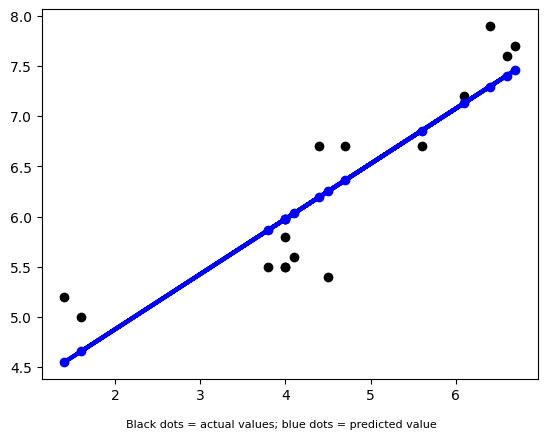

In [38]:
import matplotlib.pyplot as plt

x = X_train[['petal-length']]
x = x[-15:]
y = y_train[-15:]

# Create linear regression object
regr_ex = LinearRegression()
# Train the model using the training sets
regr_ex.fit(x, y)
y_pred_ex = regr_ex.predict(x)

fig, ax = plt.subplots()

plt.scatter(x, y, color="black")
plt.scatter(x, y_pred_ex, color="blue")
plt.plot(x, y_pred_ex, color="blue", linewidth=3);
plt.figtext(0.5, 0.01, "Black dots = actual values; blue dots = predicted value", wrap=True, horizontalalignment='center', fontsize=8);

The error squared looks like:

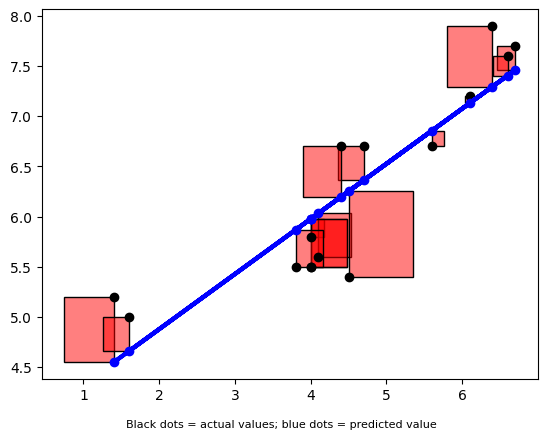

In [37]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

i = 0
while i < len(x):
    a = float(x.values[i])
    b = float(y.values[i])
    c = float(y_pred_ex[i])
    error = float(y_pred_ex[i])-float(y.values[i])
    ax.add_patch(Rectangle((a, b), 
                           error, 
                           error,
                           fc=(1,0,0,0.5), ec=(0,0,0,1), lw=1)
                 )
    i = i+1

plt.scatter(x, y, color="black")
plt.scatter(x, y_pred_ex, color="blue")
plt.plot(x, y_pred_ex, color="blue", linewidth=3);
plt.figtext(0.5, 0.01, "Black dots = actual values; blue dots = predicted value", wrap=True, horizontalalignment='center', fontsize=8);


The MSE just takes the average of these squares. The math:

$$\text{MSE} = \frac{1}{n} \sum^{n}_{i=1} (Y_i - \hat{Y}_i)^{2}$$

Where $Y_i$ and $\bar{Y}_i$ are the $i^{\text{th}}$ actual and predicted values respectively.

In addition to giving positive values, squaring in the MSE emphasizes larger differences. Which can be good or bad depending on your needs. If your data has many or very large outliers, consider removing outliers or using the [mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error). See the [sklearn MSE docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) for more info and examples. 

Increasing the number of variables uses the same concept only the regression line becomes multi-dimensional. For example, additionally, including 'sepal-length' and 'petal-length' creates a *4-dimensional* line. So it's a little hard to visualize. 